In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('admission.csv')

In [14]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [16]:
df.duplicated().sum()

0

In [17]:
df['University Rating'].value_counts()

University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64

In [18]:
df.drop(columns = ['Serial No.'], inplace = True)

In [19]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [22]:
X = df.drop(columns = ['Chance of Admit'])
y = df['Chance of Admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [23]:
y_train.shape

(400,)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled.shape

(400, 7)

In [26]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras import Input
from keras.layers import Dense

In [74]:
model = Sequential()

model.add(Input(shape=(7,)))
model.add(Dense(28, activation = 'relu'))
model.add(Dense(14, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [75]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 28)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 14)                  │             406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 743 (2.90 KB)

 Trainable params: 743 (2.90 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.compile(loss = 'mean_squared_error', optimizer = 'Adam', metrics = [keras.metrics.R2Score()])

In [83]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0038 - r2_score: 0.8122 - val_loss: 0.0033 - val_r2_score: 0.7425
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - r2_score: 0.8497 - val_loss: 0.0038 - val_r2_score: 0.7079
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - r2_score: 0.8308 - val_loss: 0.0033 - val_r2_score: 0.7339
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - r2_score: 0.8420 - val_loss: 0.0034 - val_r2_score: 0.7371
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - r2_score: 0.8316 - val_loss: 0.0032 - val_r2_score: 0.7412
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - r2_score: 0.8363 - val_loss: 0.0032 - val_r2_score: 0.7453
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - r2_score: 0.8217 - val_loss: 0.0032 - val_r2_score: 0.7437
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - r2_score: 0.8289 - val_loss: 0.0032 - val_

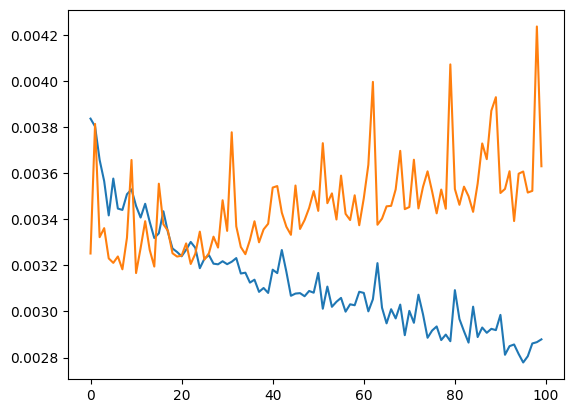

In [89]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

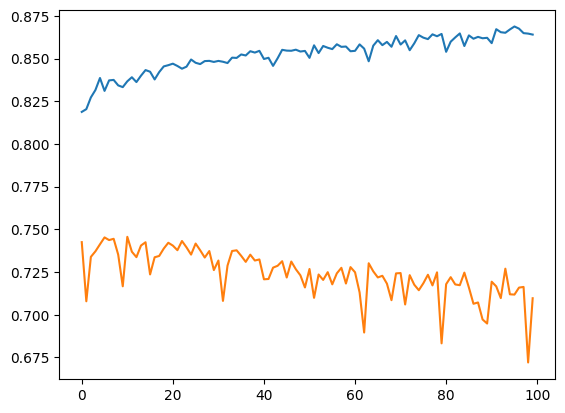

In [90]:
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])

In [92]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


In [93]:
y_pred[0]

array([0.63278306], dtype=float32)

In [94]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7955540545830978